The aim of this workbook is to explore the results of AttributionMethodsEvaluator

100%|██████████| 8/8 [00:13<00:00,  1.68s/it]


Final metrics: 
Test-Loss: 0.620311004725116
Test-Accuracy: 0.7694566813509545
Train-Loss: 0.6268332472712919
Train-Accuracy: 0.8004224834680382
# Parameters: 103
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=7, bias=True)
  )
)


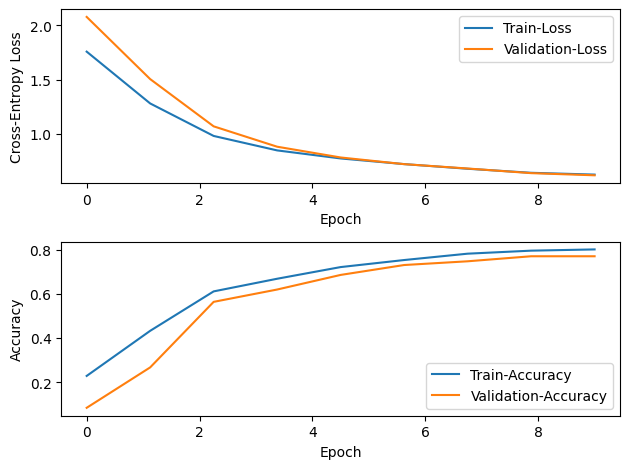

  0%|          | 0/1362 [00:00<?, ?it/s]c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:57: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
100%|██████████| 1362/1362 [00:03<00:00, 366.89it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


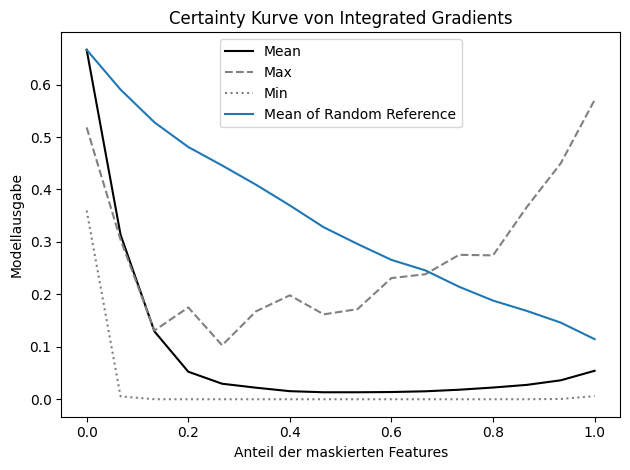

In [3]:
from model.training import train_model_and_visualize

model = train_model_and_visualize([4], num_epochs=8)

from evaluation.attribution_methods_evaluator import AttributionMethodsEvaluator
from data.datasets import DryBean
from data.util.utils import DatasetMode
from model.attribution_methods.integrated_gradients import IntegratedGradients

ig = IntegratedGradients(model.get_gradients_with_respect_to_inputs)

test_dataset = DryBean(DatasetMode.TEST)

am_eval = AttributionMethodsEvaluator(model=model)

am_eval.visualize_log_odds_of_dataset(test_dataset,ig.attribute, apply_log=False)